In [95]:
# 导入numpy库，用于数值计算，特别是对数组和矩阵的操作
import numpy as np

# 导入os库，用于与操作系统进行交互，比如文件目录操作
import os

# 在Jupyter Notebook中使用，使得matplotlib生成的图表直接嵌入显示
%matplotlib inline

# 导入matplotlib库，用于数据可视化；matplotlib是Python中最基础的绘图库
import matplotlib

# 从matplotlib导入pyplot模块，通常使用plt作为别名，提供类似MATLAB的绘图接口
import matplotlib.pyplot as plt

# 设置matplotlib中轴标签（x轴和y轴）的默认字体大小为14
plt.rcParams['axes.labelsize'] = 14 

# 设置matplotlib中y轴刻度标签的默认字体大小为12
plt.rcParams['ytick.labelsize'] = 12

# 导入warnings库，用于控制Python程序中的警告信息
import warnings

# 忽略所有警告信息，这样在运行代码时可以避免显示不重要的警告
warnings.filterwarnings('ignore')

# 设置随机数种子为42，确保np.random下的随机函数生成的随机数序列是可复现的
np.random.seed(42)

### 数据集读取
- Mnist数据是图像数据：(28,28,1)的灰度图

In [96]:
# 从sklearn.datasets导入fetch_openml函数，用于下载MNIST数据集
from sklearn.datasets import fetch_openml

# 确认数据存储目录：将当前工作目录和'data'子目录拼接，作为数据存储位置
data_dir = os.path.join(os.getcwd(), 'data')

# 下载 MNIST 数据集并保存到 data目录（已注释，因为已经下载过）
# mnist = fetch_openml("mnist_784", parser='auto', data_home=data_dir)

# 使用fetch_openml从本地加载MNIST数据集
# mnist_784是数据集的标识符
# parser='auto'让函数自动选择合适的数据解析器
# data_home指定数据存储的根目录
mnist = fetch_openml("mnist_784", parser='auto', data_home=data_dir)

# 打印数据集的详细描述信息，包括数据集的来源、特征等
print(mnist.DESCR)  # 打印数据集描述

# 从mnist对象中提取特征矩阵X和目标变量y
# X包含图像数据，y包含对应的标签
X, y = mnist.data, mnist.target
# 打印数据的形状，了解数据集的规模
print(f"数据形状: {X.shape}")  # 显示特征矩阵的维度
print(f"标签形状: {y.shape}")  # 显示标签数组的维度

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [97]:
# 从mnist字典中提取数据和目标变量
# X是特征矩阵，包含所有图像的像素值
# y是标签数组，包含每个图像对应的数字标签
X, y = mnist["data"], mnist["target"]

# 查看特征矩阵X的形状（维度）
# 返回一个元组，表示(样本数量, 特征数量)
X.shape

(70000, 784)

In [98]:
# 查看标签数组y的形状（维度）
# 返回一个元组，表示标签数组的长度（样本数量）
y.shape

(70000,)

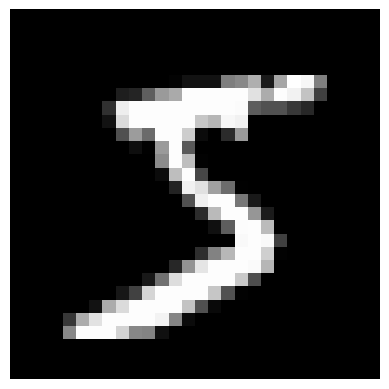

In [99]:
# 显示数据集中的第一个图像
# X.iloc[0]选择数据集中的第一个样本
# .values将pandas Series转换为numpy数组
# reshape(28, 28)将一维数组重塑为28x28的二维数组（原始图像尺寸）
# cmap='gray'指定使用灰度色彩映射显示图像
plt.imshow(X.iloc[0].values.reshape(28, 28), cmap='gray')  # 使用 .iloc 访问第 0 行

# 关闭坐标轴，使图像显示更清晰
plt.axis('off')

# 显示图像
plt.show()

![title](./img/数据集.png)

In [100]:
# 将数据集 X 和对应的标签 y 划分为训练集和测试集
# MNIST数据集的标准划分是前60000个样本作为训练集，后10000个样本作为测试集
# X[:60000] 表示取数据集 X 的前 60000 个样本作为训练集的特征
# X[60000:] 表示取数据集 X 中从第 60001 个样本开始到最后一个样本作为测试集的特征
# y[:60000] 表示取标签 y 的前 60000 个样本作为训练集的标签
# y[60000:] 表示取标签 y 中从第 60001 个样本开始到最后一个样本作为测试集的标签
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [101]:
# 洗牌操作：打乱训练集的顺序，确保数据的随机性
# 打乱数据可以防止模型学习到样本顺序相关的模式，提高泛化能力
import numpy as np

# 生成一个长度为 60000 的随机排列数组，表示打乱后的索引
# np.random.permutation(60000) 会生成 0 到 59999 的随机排列
# 由于之前设置了随机种子np.random.seed(42)，所以这个随机排列是可重现的
shuffle_index = np.random.permutation(60000)

# 使用打乱后的索引重新排列训练集的特征和标签
# X_train.iloc[shuffle_index] 表示按照 shuffle_index 的顺序重新排列训练集的特征
# y_train.iloc[shuffle_index] 表示按照 shuffle_index 的顺序重新排列训练集的标签
# 注意：X_train和y_train的对应关系保持不变，只是整体顺序被打乱
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [102]:
# 显示随机打乱后的索引数组
# 这个数组包含0到59999的随机排列，用于重新排列训练数据
shuffle_index

array([12628, 37730, 39991, ...,   860, 15795, 56422])

### 交叉验证

![title](./img/机器学习中的数据集划分与交叉验证.png)

![title](./img/K折交叉验证流程示意图.png)

In [103]:
# 将多分类问题转化为二分类问题：识别数字'1'与非'1'
# 将训练集标签中所有值为'1'的标记为True（即正类），其余为False（即负类）
# 这种转换使我们可以使用二分类算法和评估方法
# y_train == '1'创建一个布尔数组，其中数字'1'对应True，其他数字对应False
y_train_1 = (y_train == '1')

# 对测试集标签做同样的处理
# 保持训练集和测试集的处理方式一致很重要
y_test_1 = (y_test == '1')

In [104]:
# 打印训练集标签转换结果的前50个元素，确认是否正确地进行了二值化
# 这可以帮助我们验证转换是否成功：True表示数字'1'，False表示其他数字
# 通过观察这些值，我们可以确认二值化过程是否符合预期
print(y_train_1[:50])

12628    False
37730    False
39991    False
8525     False
8279     False
51012    False
14871    False
15127    False
9366     False
33322    False
53390    False
21819    False
5026     False
23428    False
45297     True
26354    False
30195    False
47038    False
20731    False
34047    False
26064    False
42469    False
29746     True
14522    False
31572    False
54949    False
19368    False
3803     False
53325    False
14300    False
51301    False
9008     False
47521    False
25224    False
48921    False
37978     True
44171    False
26303    False
19458    False
5369     False
50291    False
25951    False
54908    False
56362    False
32218    False
2885     False
36559    False
8966     False
46574    False
10530    False
Name: class, dtype: bool


In [105]:
# 导入随机梯度下降分类器
# SGDClassifier是一个使用随机梯度下降算法的线性分类器，适用于大规模数据集
from sklearn.linear_model import SGDClassifier

# 创建一个SGDClassifier实例
# max_iter=5：设置最大迭代次数为5，控制训练的轮数
# random_state=42：设置随机种子为42，确保结果可复现
# SGD是一种在线学习算法，每次只使用一部分数据进行参数更新
sgd_clf = SGDClassifier(max_iter=5, random_state=42)

# 使用训练数据X_train及其对应的二值化标签y_train_1来训练模型
# X_train包含60000个样本，每个样本有784个特征（28x28像素）
# y_train_1是二值化的标签，True表示数字'1'，False表示其他数字
# fit方法执行实际的训练过程，通过梯度下降优化模型参数
# 目标是让模型学会区分数字'1'和其他数字
sgd_clf.fit(X_train, y_train_1)

SGDClassifier(max_iter=5, random_state=42)

In [106]:
# 使用训练好的 SGD 分类器 (sgd_clf) 对单个样本进行预测
# X.iloc[35000] 表示从数据集 X 中提取索引为 35000 的样本（特征数据）
# [X.iloc[35000]] 将单个样本包装成一个列表，因为 predict 方法通常接受批量数据输入
# 即使只预测一个样本，也需要将其放入列表中，以保持二维数组的格式
# sgd_clf.predict() 是模型预测方法，返回输入样本的预测结果（True表示数字'1'，False表示非'1'）
sgd_clf.predict([X.iloc[35000]])

array([ True])

In [107]:
y[35000]
# 上面是true，这里就看看实际标签是不是“1”，打印出来是1，所以没问题

'1'

## 使用工具包进行交叉验证

In [108]:
# 导入交叉验证评估工具 cross_val_score
from sklearn.model_selection import cross_val_score

# 使用交叉验证评估 SGD 分类器 (sgd_clf) 的性能
# cross_val_score 是用于计算模型在交叉验证中得分的函数
# 参数说明：
#   - sgd_clf: 训练好的 SGD 分类器模型
#   - X_train: 训练集的特征数据
#   - y_train_1: 训练集的标签数据（假设是二分类问题，标签为 5 或非 5）
#   - cv=3: 使用 3 折交叉验证（将数据分成 3 份，轮流用其中 1 份作为验证集，其余作为训练集）
#   - scoring='accuracy': 使用准确率（accuracy）作为评估指标
cross_val_score(sgd_clf, X_train, y_train_1, cv=3, scoring='accuracy')

array([0.9905 , 0.991  , 0.98985])

In [109]:
# 导入交叉验证评估工具 cross_val_score
from sklearn.model_selection import cross_val_score

# 使用交叉验证评估 SGD 分类器 (sgd_clf) 的性能
# cross_val_score 是用于计算模型在交叉验证中得分的函数
# 参数说明：
#   - sgd_clf: 训练好的 SGD 分类器模型
#   - X_train: 训练集的特征数据
#   - y_train_1: 训练集的标签数据（假设是二分类问题，标签为 1 或非 1）
#   - cv=3: 使用 10 折交叉验证（将数据分成 10 份，轮流用其中 1 份作为验证集，其余作为训练集）
#   - scoring='accuracy': 使用准确率（accuracy）作为评估指标
cross_val_score(sgd_clf, X_train, y_train_1, cv=10, scoring='accuracy')

array([0.9885    , 0.99016667, 0.98683333, 0.9745    , 0.98333333,
       0.99233333, 0.9875    , 0.99016667, 0.983     , 0.991     ])

In [110]:
X_train.shape

(60000, 784)

In [111]:
y_train_1.shape

(60000,)

## 手动进行交叉验证

In [112]:
# 导入 StratifiedKFold 和 clone 工具
# StratifiedKFold 用于分层 K 折交叉验证，确保每一折的类别分布与整体一致
# clone 用于创建一个模型的副本，避免修改原始模型
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# 初始化 StratifiedKFold 对象
# n_splits=3 表示将数据分成 3 折
# shuffle=True 表示在划分数据前先打乱数据顺序
# random_state=42 设置随机种子，确保结果可复现
skflods = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 使用 StratifiedKFold 对训练集进行分层 K 折交叉验证
# train_index 和 test_index 分别是每一折的训练集和测试集的索引
for train_index, test_index in skflods.split(X_train, y_train_1):
    # 克隆 SGD 分类器模型，创建一个独立的副本
    clone_clf = clone(sgd_clf)
    
    # 根据当前折的训练集索引，提取训练集的特征和标签
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_1[train_index]
    
    # 根据当前折的测试集索引，提取测试集的特征和标签
    X_test_folds = X_train.iloc[test_index]
    y_test_folds = y_train_1[test_index]
    
    # 使用当前折的训练集训练克隆的模型
    clone_clf.fit(X_train_folds, y_train_folds)
    
    # 使用训练好的模型对当前折的测试集进行预测
    y_pred = clone_clf.predict(X_test_folds)
    
    # 计算预测正确的样本数量
    n_correct = sum(y_pred == y_test_folds)
    
    # 计算并打印当前折的准确率（预测正确的比例）
    print(n_correct / len(y_pred))

0.862
0.8716
0.84715


### Confusion Matrix-混淆矩阵

![title](./img/Problem.png)

在分类任务中，特别是二分类问题中，TP（True Positives）、FP（False Positives）、FN（False Negatives）和TN（True Negatives）是评估模型性能的关键指标，定义如下：

- TP (True Positives): 真阳性。指的是实际为正类且被模型正确预测为正类的样本数量。
- FP (False Positives): 假阳性。指的是实际为负类但被模型错误地预测为正类的样本数量。
- FN (False Negatives): 假阴性。指的是实际为正类但被模型错误地预测为负类的样本数量。
- TN (True Negatives): 真阴性。指的是实际为负类且被模型正确预测为负类的样本数量。

In [113]:
# 导入交叉验证预测函数cross_val_predict
from sklearn.model_selection import cross_val_predict

# 使用3折交叉验证生成训练集的预测结果
# 参数说明：
# - sgd_clf: 预定义的随机梯度下降分类器（SGDClassifier）
# - X_train: 训练集的特征数据
# - y_train_1: 目标标签，此处为二元分类问题（例如判断是否为数字1）
# - cv=3: 指定3折交叉验证，将数据分为3份，依次用其中2份训练，1份预测
# 返回值y_train_pred: 包含每个样本预测结果的数组，通过交叉验证避免模型过拟合训练数据
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3)

In [114]:
# 查看y_train_pred的形状
# y_train_pred是通过交叉验证生成的预测结果数组
# 它的形状表示预测结果的数量，通常与训练集的样本数量一致
# 返回值是一个元组，表示数组的维度
y_train_pred.shape

(60000,)

In [115]:
# 获取训练数据集X_train的形状（维度信息）
# shape属性返回一个包含数组各维度大小的元组
# 例如对于二维数组，shape[0]是行数，shape[1]是列数
print(X_train.shape)  # 打印X_train的形状

(60000, 784)


[[52985   273]
 [  300  6442]]


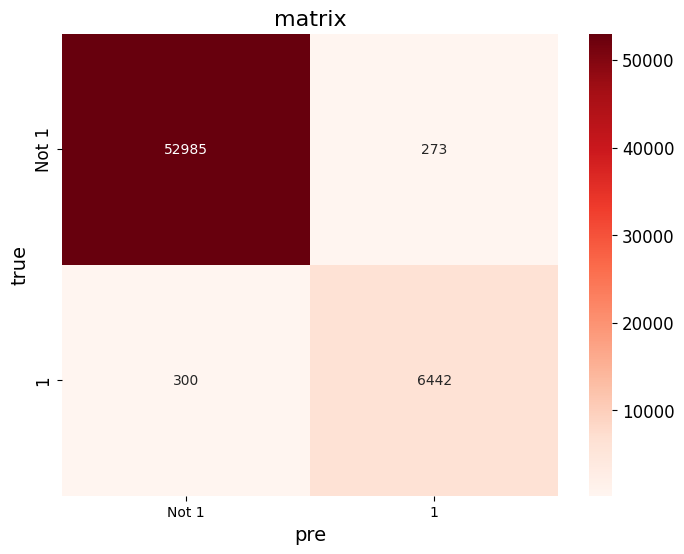

In [116]:
# 导入confusion_matrix函数
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# 使用confusion_matrix函数计算并生成训练集上的混淆矩阵
# 参数y_train_1是训练数据集的真实标签
# 参数y_train_pred是对应训练数据集上模型的预测标签
# 返回结果是一个二维数组，其中：
# 第i行第j列的元素表示实际属于第i类但被预测为第j类的样本数量
cm = confusion_matrix(y_train_1, y_train_pred)

# 打印混淆矩阵
print(cm)

# 使用 Seaborn 的 heatmap 函数绘制混淆矩阵
plt.figure(figsize=(8, 6))  # 设置图形大小
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Not 1', '1'], yticklabels=['Not 1', '1'])

plt.title('matrix', fontsize=16)
plt.xlabel('pre', fontsize=14)
plt.ylabel('true', fontsize=14)

# 显示图形
plt.show()

negative class  [[ **true negatives** , **false positives** ],
 
positive class  [ **false negatives** , **true positives** ]]

* true negatives:  53,985个数据被正确的分为非1类别
* false positives：273张被错误的分为1类别

* false negatives：300张错误的分为非1类别
* true positives： 6442张被正确的分为1类别

## 一个完美的分类器应该只有**true positives** 和 **true negatives**, 即主对角线元素不为0，其余元素为0

### Precision and Recall


### **$ precision = \frac {TP} {TP + FP} $**


### **$ recall = \frac {TP} {TP + FN} $**

![title](./img/混淆矩阵与分类性能指标示例.png)

In [117]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_1,y_train_pred)

0.9593447505584513

In [156]:
recall_score(y_train_1,y_train_pred)
# 召回率

0.9555028181548502

将**Precision** 和 **Recall**结合到一个称为**F1 score** 的指标,调和平均值给予低值更多权重。 因此，如果召回和精确度都很高，分类器将获得高F 1分数。

### $ F_1  = $ $2\over {1\over precision}+{1\over recall} $ $=$ $2×$ $precision×recall\over precision+recall $ $=$ $TP\over {TP}+{FN + FP\over 2}$

In [157]:
from sklearn.metrics import f1_score
f1_score(y_train_1,y_train_pred)

0.9574199301478784

### 阈值对结果的影响

![title](./img/不同阈值下的精确率和召回率变化示例.png)

In [173]:
# 使用训练好的 SGD 分类器 (sgd_clf) 对单个样本进行决策函数值计算
# decision_function 方法返回每个样本属于正类（这里是数字 '1'）的置信度分数
y_scores = sgd_clf.decision_function([X.iloc[35000]])
print("Decision function score for sample 35000:", y_scores)

Decision function score for sample 35000: [166791.30564515]


In [174]:
# 设定一个阈值 t 来手动决定分类结果
# 如果决策函数值大于这个阈值，则认为该样本属于正类
t = 50000
y_pred = (y_scores > t)
print("Prediction with threshold of 50000:", y_pred)

Prediction with threshold of 50000: [ True]


Scikit-Learn不允许直接设置阈值，但它可以得到决策分数，调用其**decision_function（）**方法，而不是调用分类器的**predict（）**方法，该方法返回每个实例的分数，然后使用想要的**阈值**根据这些分数进行预测：

In [175]:
# 使用 cross_val_predict 函数进行交叉验证预测，并获取决策函数值
# cv=3 表示使用 3 折交叉验证；method="decision_function" 指定返回决策函数值而不是默认的概率估计
y_scores = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3,
                             method="decision_function")

In [176]:
# 打印前10个样本的决策函数值
print("First 10 decision function scores from cross-validation:\n", y_scores[:10])

First 10 decision function scores from cross-validation:
 [ -993793.57094401  -792034.55721758  -368429.86266686  -657246.17518583
 -1063521.3805351   -868383.19576801 -1310177.73205922  -931904.25806185
  -755448.10653871 -1089568.8235572 ]


In [177]:
# 计算精确率、召回率和对应的阈值
# precision_recall_curve 函数基于真实的标签 (y_train_1) 和预测的得分 (y_scores) 来计算这些指标
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores)

In [178]:
# 查看训练集标签的真实形状
y_train_1.shape

(60000,)

In [179]:
# 查看阈值数组的形状
thresholds.shape

(60000,)

In [180]:
precisions[:10]

array([0.11236667, 0.11236854, 0.11237041, 0.11237229, 0.11237416,
       0.11237603, 0.1123779 , 0.11237978, 0.11238165, 0.11238352])

In [181]:
# 查看精确率数组的形状
precisions.shape

(60001,)

In [182]:
# 查看召回率数组的形状
recalls.shape

(60001,)

<Figure size 800x400 with 0 Axes>

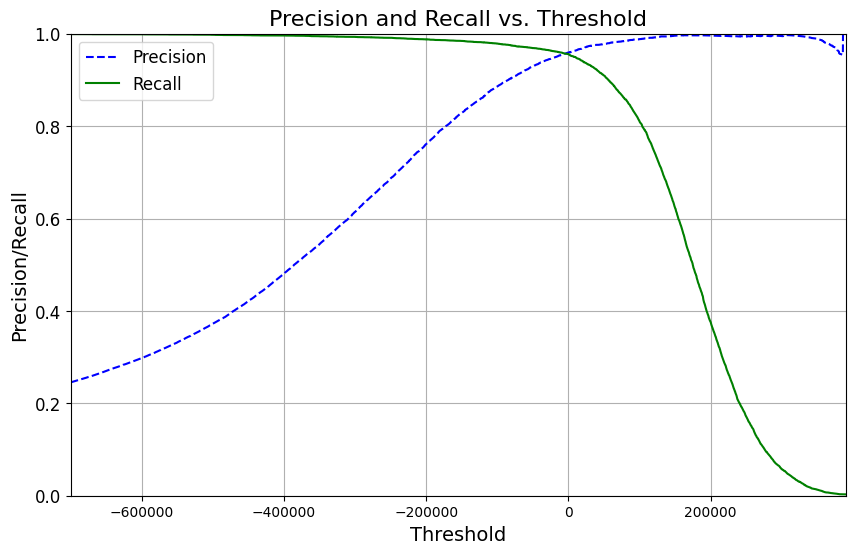

In [183]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    绘制精确率和召回率相对于阈值的变化图。

    参数:
    precisions (list): 精确率列表。
    recalls (list): 召回率列表。
    thresholds (list): 阈值列表。
    """
    plt.figure(figsize=(10, 6))  
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")  
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")  

    plt.xlabel("Threshold", fontsize=14)  
    plt.ylabel("Precision/Recall", fontsize=14)  
    plt.title("Precision and Recall vs. Threshold", fontsize=16)  
    plt.legend(loc="upper left", fontsize=12)  
    plt.grid(True) 
    plt.ylim([0, 1])  
    plt.xlim([min(thresholds), max(thresholds)])  
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.xlim([-700000, 390000])
plt.show()

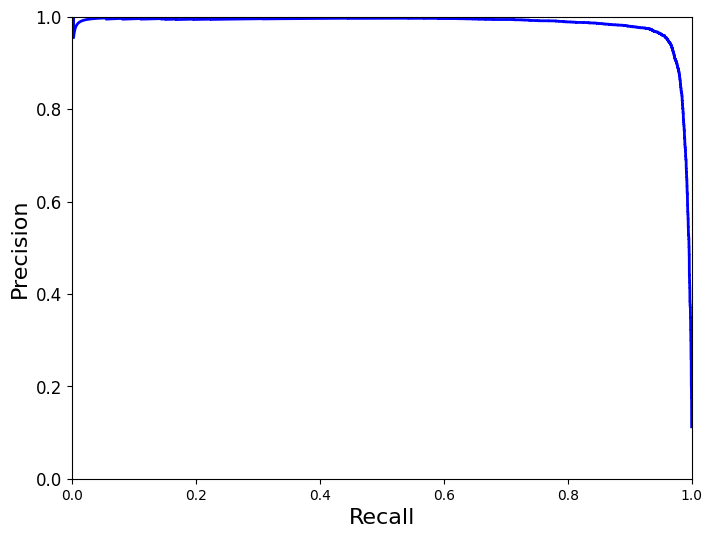

In [184]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, 
             precisions, 
             "b-", 
             linewidth=2)
    
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### ROC curves
**receiver operating characteristic (ROC)** 曲线是二元分类中的常用评估方法
* 它与精确度/召回曲线非常相似，但ROC曲线不是绘制精确度与召回率，而是绘制**true positive rate(TPR)** 与**false positive rate(FPR)** 

* 要绘制ROC曲线，首先需要使用**roc_curve（）**函数计算各种阈值的**TPR和FPR**：

TPR = TP / (TP + FN) (Recall)

FPR = FP / (FP + TN)

In [185]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train_1, y_scores)

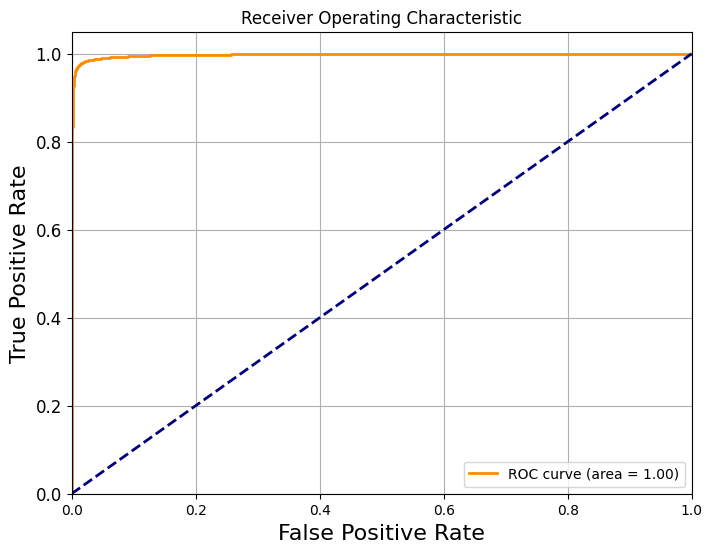

In [186]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, roc_auc, label=None):
    """
    绘制ROC曲线并显示AUC面积。

    参数:
    fpr (list): 假正例率列表。
    tpr (list): 真正例率列表。
    roc_auc (float): ROC曲线下的面积（AUC值）。
    label (str): 图例标签。
    """
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.grid(True)  # 添加网格线


# 计算ROC曲线上的点
fpr, tpr, thresholds = roc_curve(y_train_1, y_scores)

# 计算AUC值
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线并显示AUC面积
plot_roc_curve(fpr, tpr, roc_auc)
plt.show()

**虚线表示纯随机分类器的ROC曲线**; 一个好的分类器尽可能远离该线（朝左上角）。

比较分类器的一种方法是测量曲线下面积（AUC）。完美分类器的ROC AUC**等于1**，而纯随机分类器的ROC AUC**等于0.5**。 Scikit-Learn提供了计算ROC AUC的函数：

In [187]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_1, y_scores)

0.9972526261202149

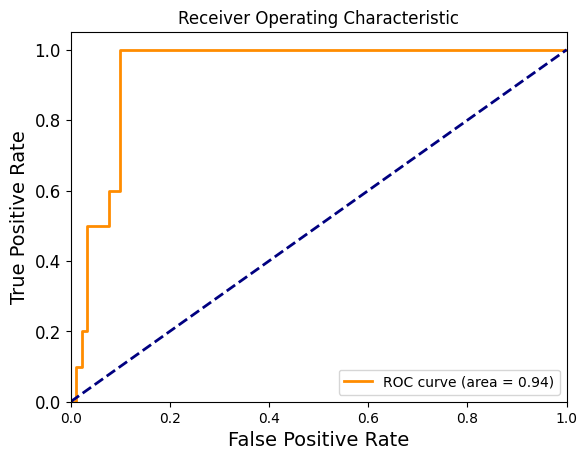

In [188]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 假设真实标签
y_true = np.array([0] * 90 + [1] * 10)  # 90个负类和10个正类

# 假设模型预测的概率得分
# 让正类的得分显著高于负类，以获得更好的区分能力
y_scores = np.concatenate([np.random.rand(80) * 0.1, np.random.rand(20) * 0.9 + 0.1])

# 计算ROC曲线上的点
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# 计算AUC值
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()